In [1]:
import numpy
town1_heights = [5, 6, 7, 6, 7.1, 6, 4]
town2_heights = [5.5, 6.5, 7, 6, 7.1, 6]

town1_mean = numpy.mean(town1_heights)
town2_mean = numpy.mean(town2_heights)

print "Town 1 avg. height", town1_mean
print "Town 2 avg. height", town2_mean

print "Effect size: ", abs(town1_mean - town2_mean)

Town 1 avg. height 5.87142857143
Town 2 avg. height 6.35
Effect size:  0.478571428571


It looks like town 2's average height (6.35 feet) is higher than town 1 (5.87 feet) by a difference of .479 feet.  This difference is called the ** effect size **.  Town 2 certainly looks taller than Town 1!

It would be nice to more than just compare averages.  Let's try to look at a histogram of the distributions.

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

increment = 1
width= .25

# rounds down to the nearest 1
town1_bucketted = map(lambda ammt: ammt - ammt%increment, town1_heights)
town2_bucketted = map(lambda ammt: ammt - ammt%increment + width, town2_heights)
town1_hist = Counter(town1_bucketted)
town2_hist = Counter(town2_bucketted)

In [9]:
minamount = min(min(town1_heights), min(town2_heights))
maxamount = max(max(town1_heights), max(town2_heights))
buckets = range(int(minamount), int(maxamount)+1, increment)

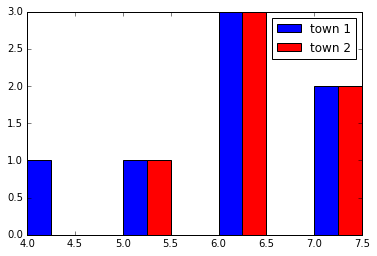

In [13]:
%matplotlib inline
fig = plt.figure()
sub = fig.add_subplot(111)
sub.bar(town1_hist.keys(), town1_hist.values(), color='b', width=width, label="town 1")
sub.bar(town2_hist.keys(), town2_hist.values(), color='r', width=width, label="town 2")
sub.legend()
# plt.savefig('figures/town_histograms.png', format='png')
plt.show()

Not bad!  The buckets are all exactly the same size except for one person of height between 4 and 5 feet in town 1.

For large datasets, a histogram might have too much information on it to be helpful.  Luckily, descriptive  statisticians have a more concise visualization.  It's called a box-and-whisker plot!  The code for it is quite simple as well:

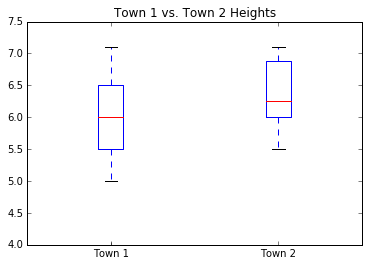

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
sub = fig.add_subplot(111)
sub.boxplot([town1_heights, town2_heights], whis=1)
sub.set_xticklabels(("Town 1", "Town 2"))
sub.set_title("Town 1 vs. Town 2 Heights")
plt.show()
# plt.savefig('figures/town_boxplots.png', format='png')

Let's interpret this plot.  We show town 1 on the left and town 2 on the right.  Each town is represented by a box with a red line and whiskers.

* The red line in the box represents the ** median **, or ** 50th percentile ** value of the distribution.  If we sort the dataset, 50% of the values will be below this line, and 50% will be above it.
* The bottom edge of the box represents the ** 25th percentile ** (the value larger than 25% of your dataset), and the top edge represents the ** 75th percentile ** (the value larger than 75% of your dataset).  The difference between the 75th and 25th percentile is called the ** inner quartile range (IQR) **.
* The whiskers represent the "extremes" of our dataset: the largest value we're willing to consider in our dataset before calling it an outlier.  In our case, we set ** whis=1 **,  requesting that we show whiskers the most extreme value at a distance of at most 1x the IQR from the bottom and top edges of the box plot.

If normal distributions are your thing, [this image](https://en.wikipedia.org/wiki/File:Boxplot_vs_PDF.svg) might help you interpret the box-and-whiskers plot.

Like in the histogram, we see that the towns' height distributions don't look all that different from one-another. Generally, if the boxes of each distribution overlap, and you haven't taken something on the order of a buttload (metric units) of measurements, you should doubt the differenes in distribution averages. It looks like a single height measurement for town 1 is pretty far away from the others, and you should investigate such measurements as potential outliers.

We have two population height averages.  We know that they are different, but charts show that overall the two towns look similar. How will we definitively say whether the differences we observe are meaningful?

In statistics, what we are asking is whether differences we observed are reliable indicators of some trend, or just happened by luck chance. For example, we might simply have measured particularly short members of town 1 and tall members of town 2.  ** Statistical significance ** is a measure of the probability that, for whatever reason, we stumbled upon the results we did by chance.

There are several tests for statistical significance, each applying to a different question.  Our question is: "Is the difference between the average height of people in town 1 and town 2 statistically significant?"  We ask a similar question about the difference in average campaign contributions.  The test that answers this question is the [T-Test](https://en.wikipedia.org/wiki/Student's_t-test).  There are several flavors of T-Test and we will discuss these soon, but for now we'll focus on Welch's T-Test.

In [ ]:
import welchttest

print "Welch's T-Test p-value:", welchttest.ttest(town1_heights, town2_heights)

The Welch's T-Test emitted a p-value of ** .349 **.  A p-value is the probability that the effect size of .479 feet between town 1 and town 2 happened by chance. In this case, there's 34.9% chance that we've arrived at our effect size by chance.

What's a good cutoff for p-values to know whether we should trust the effect size we're seeing?  Two popular values are .05 or .01: if there is less than a 5% or 1% chance that we arrived at our answer by chance, we're willing to say that we have a ** statistically significant ** result.

So in our case, our result is not significant.  Had we taken more measurements, or if the differences in heights were farther apart, we might have reached significance. But, given our current results, let's not jump to conclusions.

### Can You Have a Very Significant Result?
 
No.  There is no such thing as "very" or "almost" significant. Remember: the effect size is the interesting observation, and it's up to you what makes for an impressive effect size depending on the situation.  You can have small effects, large effects, and everything in between.  Significance testing tells us whether to believe that the observations we made happened by anything more than random chance.  While people disagree about whether a p-value of .05 or .01 is required, they all agree that significance is a binary value.


### Types of T-Test 

The T-Test has two major flavors: paired and unpaired.

Sometimes your datasets are ** paired ** (also called ** dependent **). For example, you may be measuring the performance of the same set of students on an exam before and after teaching them the course content.  To use a paired T-Test, you have to be able to measure an item twice, usually before and after some treatment.  This is the ideal condition: by having before and after measurements of a treatment, you control for other potential differences in the items you mentioned, like performance between students.

Other times, you are measuring the difference between two sets of measured data, but the individual measurements in each dataset are ** unpaired ** (sometimes called ** independent **).  This was the case in our tests: different people contributed to each campaign, and different people live in town 1 and 2.  With unpaired datasets, we lose the ability to control for differences between individuals, so we'll likely need more data to achieve statistical significance.

Unpaired datasets come in all flavors.  Depending on whether the sizes of the sets are equal or unequal, and depending on whether the variances of both sets are equal, you will run different versionf of an unpaired T-Test.  In our case, we made no assumptions about the sizes of our datasets, and no assumptions on their variances, either.  So we went with an unpaired, unequal size, unequal variance test.  That's Welch's T-Test.

As with all life decisions, if you want more details, check out the Wikipedia article on [T-Tests](https://en.wikipedia.org/wiki/Student's_t-test).  There are implementations of [paired T-Tests](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)
and [unpaired ones](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) in scipy.  The unequal variance case is not available in scipy, which is why we included welchsttest.py.  Enjoy it!

### T-Test Assumptions we Broke :(

We've managed to sound like smartypantses that do all the right things until this moment, but now we have to admit we broke a few rules.  The math behind T-Tests makes assumptions about the datasets that makes it easier to achieve statistical significance if those assumptions are true.  The big assumption is that the data we used came from a normal distribution.

The first thing we should have done is check whether or not our data is actually normal.  Luckily, the fine scipy folks have implemented the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro-Wilk) test for normality.  This test calculates a p-value, that, if low enough (usually < 0.05), tells us there is a low chance the distribution is normal.

In [ ]:
import scipy.stats

print "Town 1 Shapiro-Wilks p-value", scipy.stats.shapiro(town1_heights)[1]

With a p-value of .380, we don't have enough evidence that our town heights are not normally distributed, so it's probably fine to run Welch's T-Test

If it turned out that we likely broke the normality assumption of Welch's T-Test, this would be OK for two reasons: 

* T-Tests are resilient to breaking of the normality assumption
* There are ** nonparametric ** equivalents that don't make normality assumptions.  They are more conservative since they can't make assumptions about the data, and thus likely require a larger sample size to reach significance.  If you're alright with that, feel free to run the [Mann-Whitney U](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U) nonparametric version of the T-Test, which has a wonderful name.

In [ ]:
import scipy.stats

print "Mann-Whitney U p-value", scipy.stats.mannwhitneyu(town1_heights, town2_heights)[1]

Remember: we don't need to run the Mann-Whitney U test on our town data, since it didn't exhibit non-normalcy.  And besides, the p-value is .254.  That's still not significant.  This makes sense: our less conservative Welch's test was unable to give us significance, so we don't expect a more conservative test to magically find significance.

### Putting it All Together

So far, we've learned the steps to test a hypothesis:

* Compute summary statistics, like averages or medians, and see if these numbers match your intuition.

* Look at the distribution histograms or summary visualizations like box plots to understand whether your hypothesis appears to be backed up by the data

* If it's not immediately clear your hypothesis was wrong, test it using the appropriate statistical test to 1) quantify the effect size, and 2) ensure the data you observed couldn't have happened by chance.

There's a lot more to statistics than T-Tests, which compare two datasets' averages.  Next, we'll cover correlation between two datasets using [linear regression](regression.html).